## Palmer Penguins
***
***





This notebook contains the analysis of the [Palmer Penguins dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The dataset contains the data of 344 penguins from three species: Adelie, Chinstrap and Gentoo from three islands: Biscoe, Dream and Torgersen.  11 NAN values were removed. Data analysis was therefore carried out on 333 penguins. 

Each row in the dataset represents a penguin, Each column represents a variable. There are 7 variables. 3 of which are categorical variables. These include species, island and sex. 
There are 4 numerical variables. Numerical variables represent the physical measurements of the penguins. These include body mass(g), flipper length(mm), bill length(mm) and bill depth(mm).  



***



### **1. Imports:**


In [1]:

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns





Pandas is a python library for data manipulation and analysis built on top of Numpy. It is used for the dataFrame data structure. A pandas dataFrame is a 2D array or a table with rows and columns. 


[Numpy](https://numpy.org/doc/stable/user/whatisnumpy.html)

Numpy is a powerful library for numerical computing of Python. Pandas is a library for data manipulation and analysis built on top of Numpy. It is used for the dataFrame data structure. 



 [matplotlib](https://www.w3schools.com/python/matplotlib_intro.asp)
 
 [seaborn](https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp)

***
### **2. Load Data:**


The dataset was loaded from the .csv file obtaind from the seaborn github repository into a dataFrame using Pandas. 

The first and last rows were looked at

In [2]:
# Load the penguins data set from URL.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [3]:
# Have a look at first and last few rows of the data set.

df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


***
### **3. Inspect Data:**


In [4]:
#count the sex of the penguins
df['sex'].value_counts()


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [5]:
# information about the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


float64 represents a floating point number data type that uses 64 bits of memory to store each number. 





In [6]:
# check missing values
df.isna().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# Rows with missing values
df[df.isnull().any(axis=1)]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


**4. Summary statistics:**

In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
# mean by species, sex and island
df.groupby(['species', 'sex', 'island']).mean()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex    island                                                        
Adelie    FEMALE Biscoe          37.359091      17.704545         187.181818   
                 Dream           36.911111      17.618519         187.851852   
                 Torgersen       37.554167      17.550000         188.291667   
          MALE   Biscoe          40.590909      19.036364         190.409091   
                 Dream           40.071429      18.839286         191.928571   
                 Torgersen       40.586957      19.391304         194.913043   
Chinstrap FEMALE Dream           46.573529      17.588235         191.735294   
          MALE   Dream           51.094118      19.252941         199.911765   
Gentoo    FEMALE Biscoe          45.563793      14.237931         212.706897   
          MALE   Biscoe          49.473770      15.718033         221.540984   

                            body_mass_g  
species   sex    island                  
Adelie    FEMALE Biscoe     3369.318182  
                 Dream      3344.444444  
                 Torgersen  3395.833333  
          MALE   Biscoe     4050.000000  
                 Dream      4045.535714  
                 Torgersen  4034.782609  
Chinstrap FEMALE Dream      3527.205882  
          MALE   Dream      3938.970588  
Gentoo    FEMALE Biscoe     4679.741379  
          MALE   Biscoe     5484.836066

In [10]:
df.shape

(344, 7)

In [11]:
# remove missing values 
df.dropna(inplace=True)

df.shape


(333, 7)

In [12]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
# mean by species, sex and island
df.groupby(['species', 'sex', 'island']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex    island                                                        
Adelie    FEMALE Biscoe          37.359091      17.704545         187.181818   
                 Dream           36.911111      17.618519         187.851852   
                 Torgersen       37.554167      17.550000         188.291667   
          MALE   Biscoe          40.590909      19.036364         190.409091   
                 Dream           40.071429      18.839286         191.928571   
                 Torgersen       40.586957      19.391304         194.913043   
Chinstrap FEMALE Dream           46.573529      17.588235         191.735294   
          MALE   Dream           51.094118      19.252941         199.911765   
Gentoo    FEMALE Biscoe          45.563793      14.237931         212.706897   
          MALE   Biscoe          49.473770      15.718033         221.540984   

                            body_mass_g  
species   sex    island                  
Adelie    FEMALE Biscoe     3369.318182  
                 Dream      3344.444444  
                 Torgersen  3395.833333  
          MALE   Biscoe     4050.000000  
                 Dream      4045.535714  
                 Torgersen  4034.782609  
Chinstrap FEMALE Dream      3527.205882  
          MALE   Dream      3938.970588  
Gentoo    FEMALE Biscoe     4679.741379  
          MALE   Biscoe     5484.836066

In [14]:

df.groupby(['species', 'sex'])['body_mass_g'].describe()

count         mean         std     min      25%     50%  \
species   sex                                                               
Adelie    FEMALE   73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
          MALE     73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
Chinstrap FEMALE   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
          MALE     34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
Gentoo    FEMALE   58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
          MALE     61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
species   sex                      
Adelie    FEMALE  3550.00  3900.0  
          MALE    4300.00  4775.0  
Chinstrap FEMALE  3693.75  4150.0  
          MALE    4100.00  4800.0  
Gentoo    FEMALE  4875.00  5200.0  
          MALE    5700.00  6300.0

In [15]:
df.groupby(['species', 'sex'])['flipper_length_mm'].describe()

count        mean       std    min     25%    50%     75%  \
species   sex                                                                 
Adelie    FEMALE   73.0  187.794521  5.595035  172.0  185.00  188.0  191.00   
          MALE     73.0  192.410959  6.599317  178.0  189.00  193.0  197.00   
Chinstrap FEMALE   34.0  191.735294  5.754096  178.0  187.25  192.0  195.75   
          MALE     34.0  199.911765  5.976558  187.0  196.00  200.5  203.00   
Gentoo    FEMALE   58.0  212.706897  3.897856  203.0  210.00  212.0  215.00   
          MALE     61.0  221.540984  5.673252  208.0  218.00  221.0  225.00   

                    max  
species   sex            
Adelie    FEMALE  202.0  
          MALE    210.0  
Chinstrap FEMALE  202.0  
          MALE    212.0  
Gentoo    FEMALE  222.0  
          MALE    231.0

In [16]:
df.groupby(['species', 'sex'])['bill_length_mm'].describe()

count       mean       std   min     25%    50%     75%  \
species   sex                                                               
Adelie    FEMALE   73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
          MALE     73.0  40.390411  2.277131  34.6  39.000  40.60  41.500   
Chinstrap FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
          MALE     34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
Gentoo    FEMALE   58.0  45.563793  2.051247  40.9  43.850  45.50  46.875   
          MALE     61.0  49.473770  2.720594  44.4  48.100  49.50  50.500   

                   max  
species   sex           
Adelie    FEMALE  42.2  
          MALE    46.0  
Chinstrap FEMALE  58.0  
          MALE    55.8  
Gentoo    FEMALE  50.5  
          MALE    59.6

In [17]:
df.groupby(['species', 'sex'])['bill_depth_mm'].describe()

count       mean       std   min   25%    50%    75%   max
species   sex                                                               
Adelie    FEMALE   73.0  17.621918  0.942993  15.5  17.0  17.60  18.30  20.7
          MALE     73.0  19.072603  1.018886  17.0  18.5  18.90  19.60  21.5
Chinstrap FEMALE   34.0  17.588235  0.781128  16.4  17.0  17.65  18.05  19.4
          MALE     34.0  19.252941  0.761273  17.5  18.8  19.30  19.80  20.8
Gentoo    FEMALE   58.0  14.237931  0.540249  13.1  13.8  14.25  14.60  15.5
          MALE     61.0  15.718033  0.741060  14.1  15.2  15.70  16.10  17.3

***
### **4. Visualisation of Data:**


#### Barcharts: 

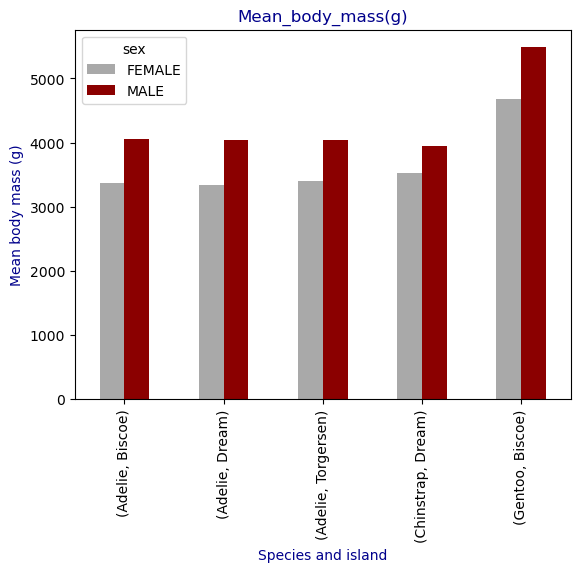

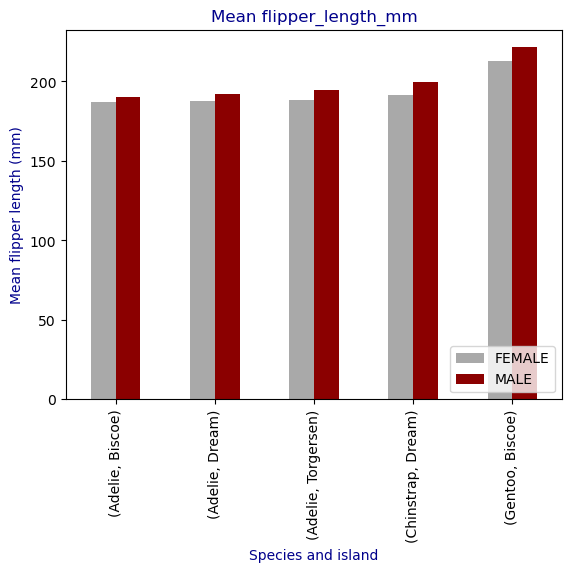

In [18]:
# bar chart body mass by island and species
df.groupby(['species', 'island', 'sex'])['body_mass_g'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean body mass (g)', color='darkblue')
plt.title('Mean_body_mass(g)', color='darkblue')
plt.show()

# bar chart mean flipper length by island and species
df.groupby(['species', 'island', 'sex'])['flipper_length_mm'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean flipper length (mm)', color='darkblue')
plt.title('Mean flipper_length_mm', color='darkblue')
plt.legend(loc='lower right')
plt.show()

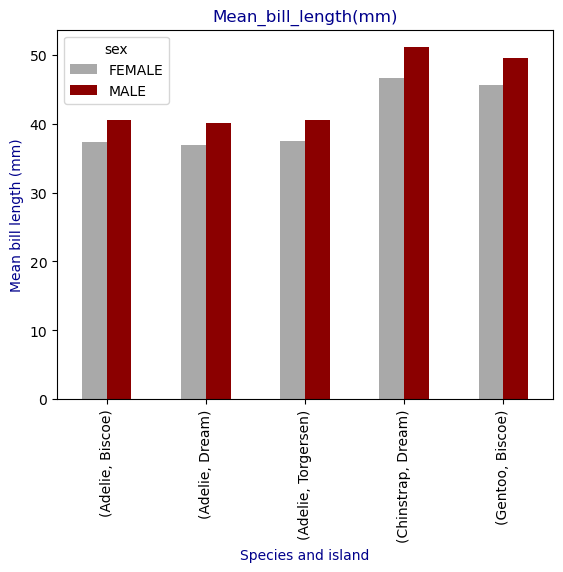

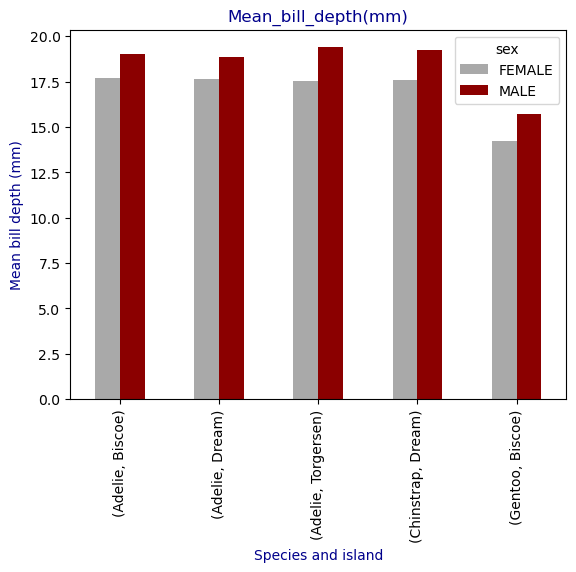

In [19]:
# bar chart bill length by island and species
df.groupby(['species', 'island', 'sex'])['bill_length_mm'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean bill length (mm)', color='darkblue')
plt.title('Mean_bill_length(mm)', color='darkblue')
plt.show()

# bar chart bill depth by island and species
df.groupby(['species', 'island', 'sex'])['bill_depth_mm'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean bill depth (mm)', color='darkblue')
plt.title('Mean_bill_depth(mm)', color='darkblue')
plt.show()

#### Histograms:

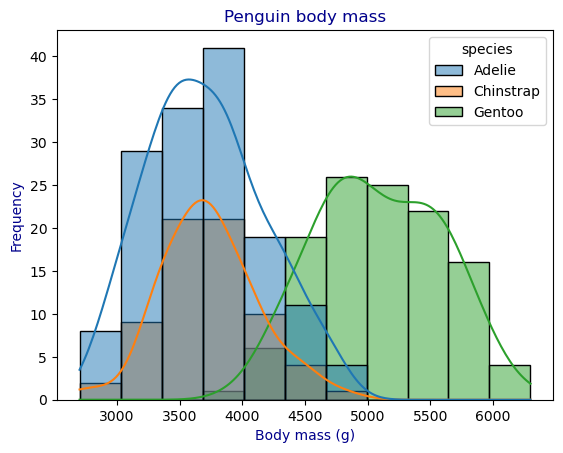

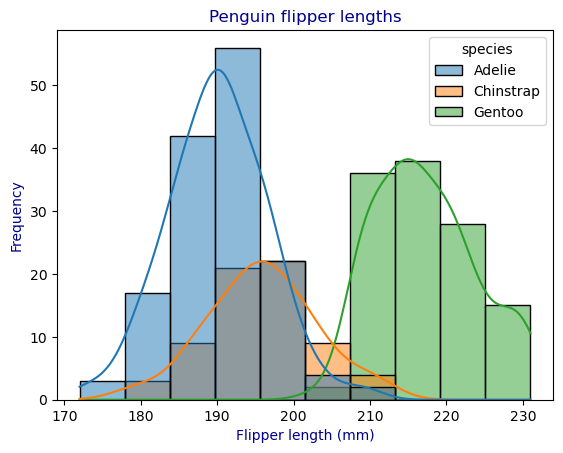

In [20]:
# suppress seaborn warnings 
import warnings
warnings.filterwarnings("ignore")

# plot histogram of body mass per species
sns.histplot(df, x='body_mass_g', hue='species', kde=True)
plt.xlabel('Body mass (g)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Penguin body mass', color='darkblue')
plt.show()

# plot histogram of flipper length per species
sns.histplot(df, x='flipper_length_mm', hue='species', kde=True)
plt.xlabel('Flipper length (mm)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Penguin flipper lengths', color='darkblue')
plt.show()

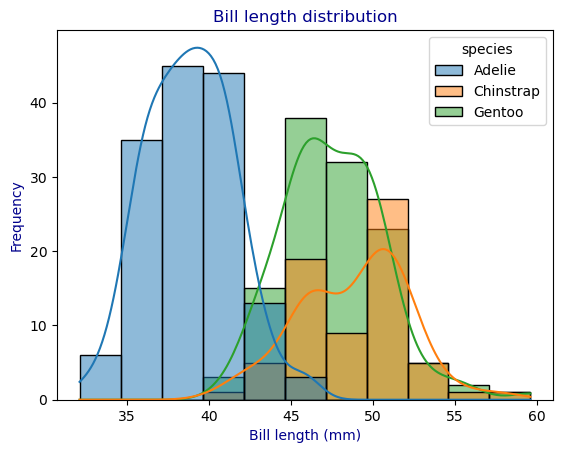

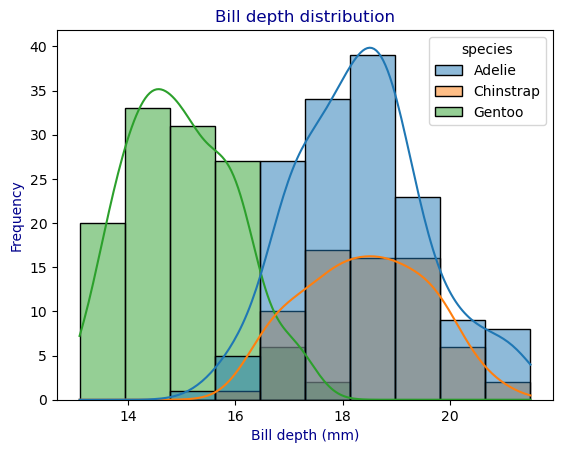

In [21]:
# plot histogram of bill length per species
sns.histplot(df, x='bill_length_mm', hue='species', kde=True)
plt.xlabel('Bill length (mm)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Bill length distribution', color='darkblue')
plt.show()

# plot histogram of bill depth per species
sns.histplot(df, x='bill_depth_mm', hue='species', kde=True)
plt.xlabel('Bill depth (mm)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Bill depth distribution', color='darkblue')
plt.show()

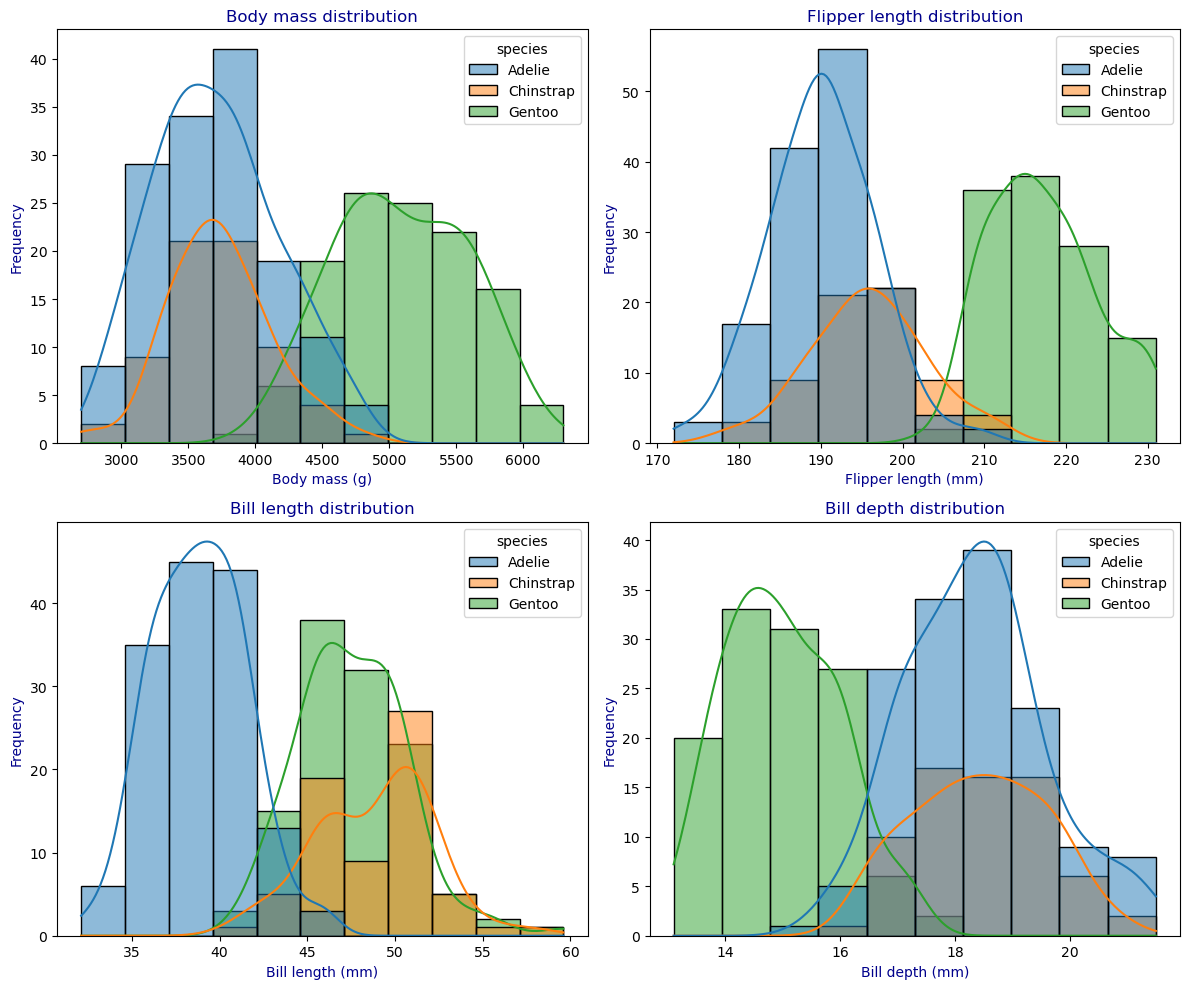

In [22]:
# historam subplots of body mass, flipper length, bill length and bill depth per species    
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df, x='body_mass_g', hue='species', kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Body mass (g)', color='darkblue')
axs[0, 0].set_ylabel('Frequency', color='darkblue')
axs[0, 0].set_title('Body mass distribution', color='darkblue')

sns.histplot(df, x='flipper_length_mm', hue='species', kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Flipper length (mm)', color='darkblue')
axs[0, 1].set_ylabel('Frequency', color='darkblue')
axs[0, 1].set_title('Flipper length distribution', color='darkblue')

sns.histplot(df, x='bill_length_mm', hue='species', kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Bill length (mm)', color='darkblue')
axs[1, 0].set_ylabel('Frequency', color='darkblue')
axs[1, 0].set_title('Bill length distribution', color='darkblue')

sns.histplot(df, x='bill_depth_mm', hue='species', kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Bill depth (mm)', color='darkblue')
axs[1, 1].set_ylabel('Frequency', color='darkblue')
axs[1, 1].set_title('Bill depth distribution', color='darkblue')

plt.tight_layout()
plt.show()

#### Pairplot:

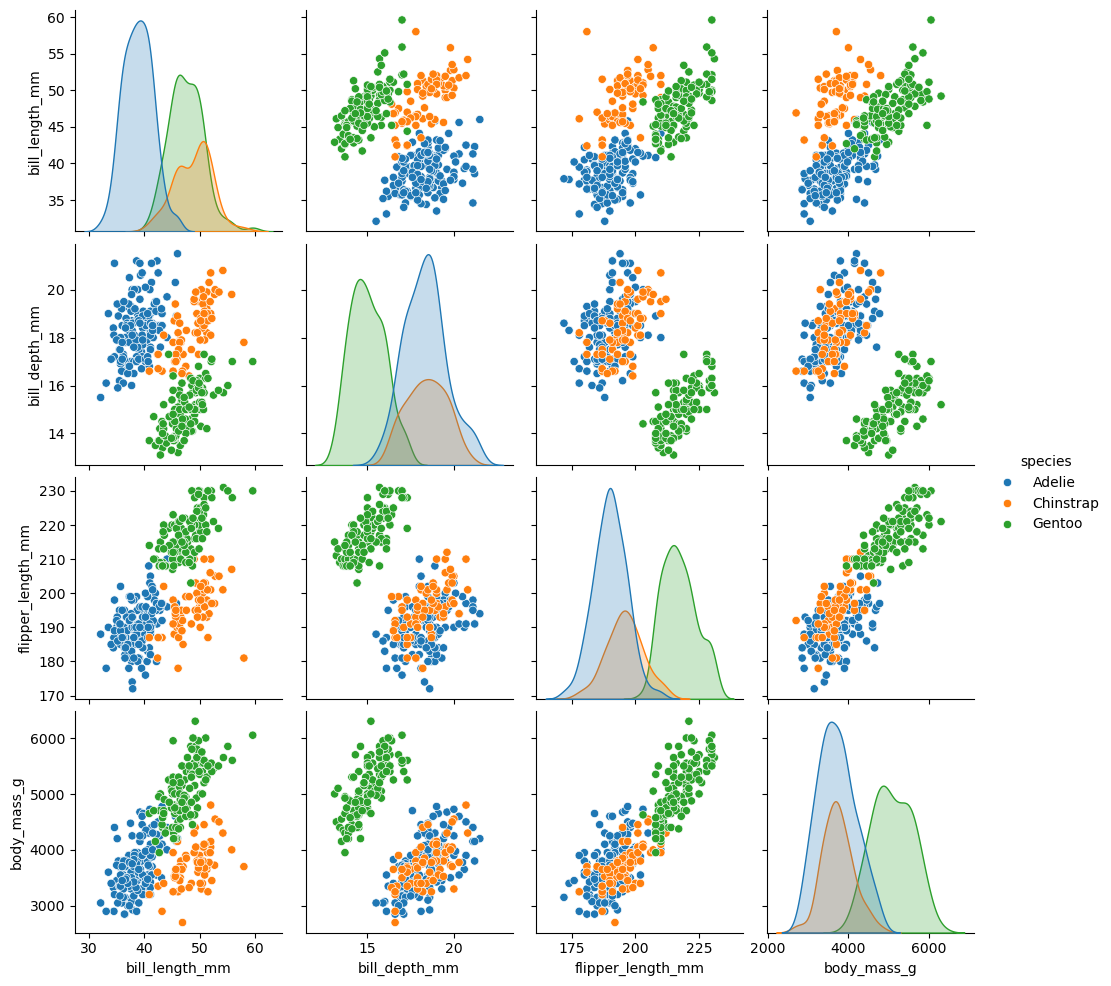

In [38]:

# pairplot of the data set in seaborn
sns.pairplot(df, hue='species')
plt.show()

***
## **Correlation:**


In [24]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Correlation between numerical variables:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


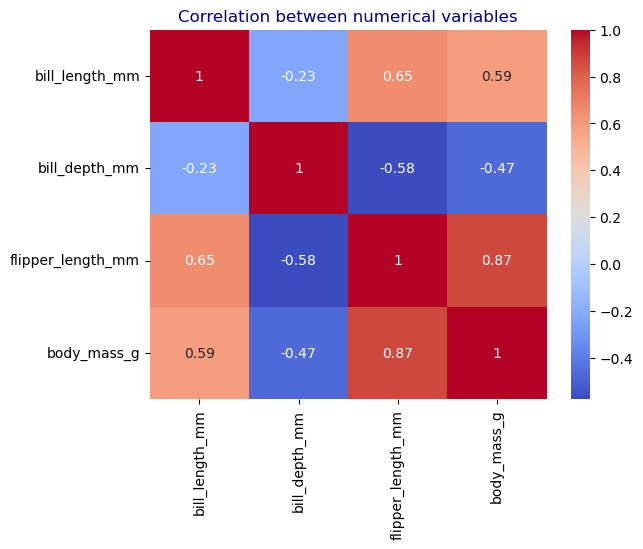

In [36]:
# correlation matrix of numerical variables
numerical_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
 
correlation = df[numerical_variables].corr()
print('Correlation between numerical variables:')
print(correlation)

# correlation matrix heatmap    
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between numerical variables', color='darkblue')

plt.show()



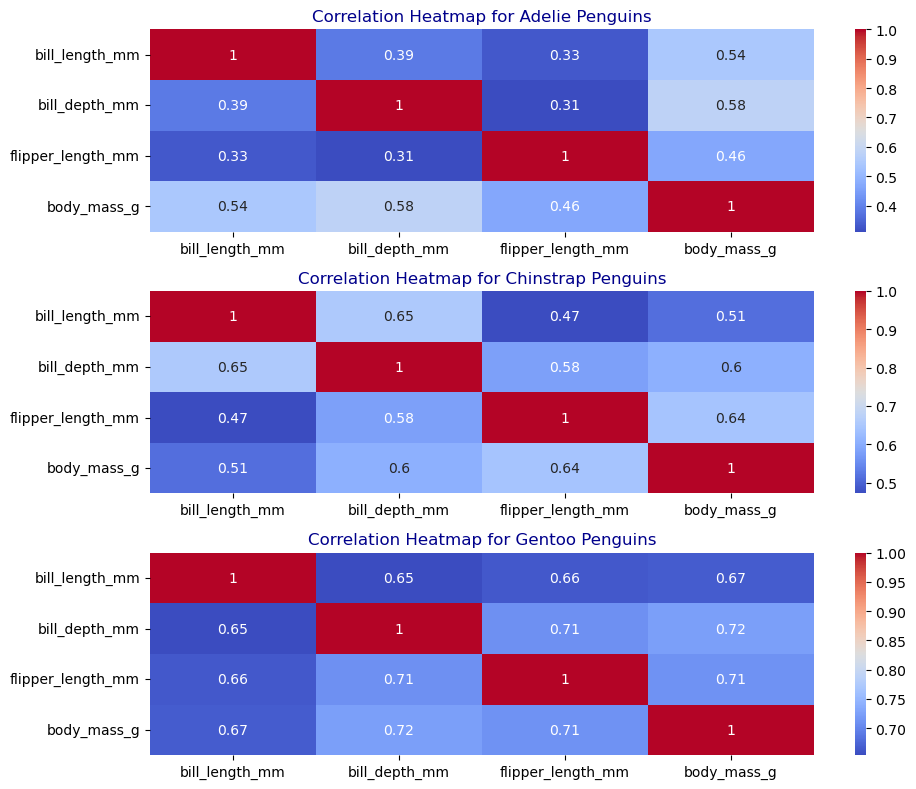

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of species
species_list = df['species'].unique()

# Create subplots for each species
fig, axes = plt.subplots(nrows=len(species_list), figsize=(10, 8))

# Iterate over each species
for i, species in enumerate(species_list):
    # Filter data for the current species
    species_df = df[df['species'] == species]
    
    # Filter numerical variables
    numerical_variables = species_df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlation matrix
    correlation = numerical_variables.corr()
    
    # Create heatmap for the current species
    sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {species} Penguins', color='darkblue')

plt.tight_layout()
plt.show()


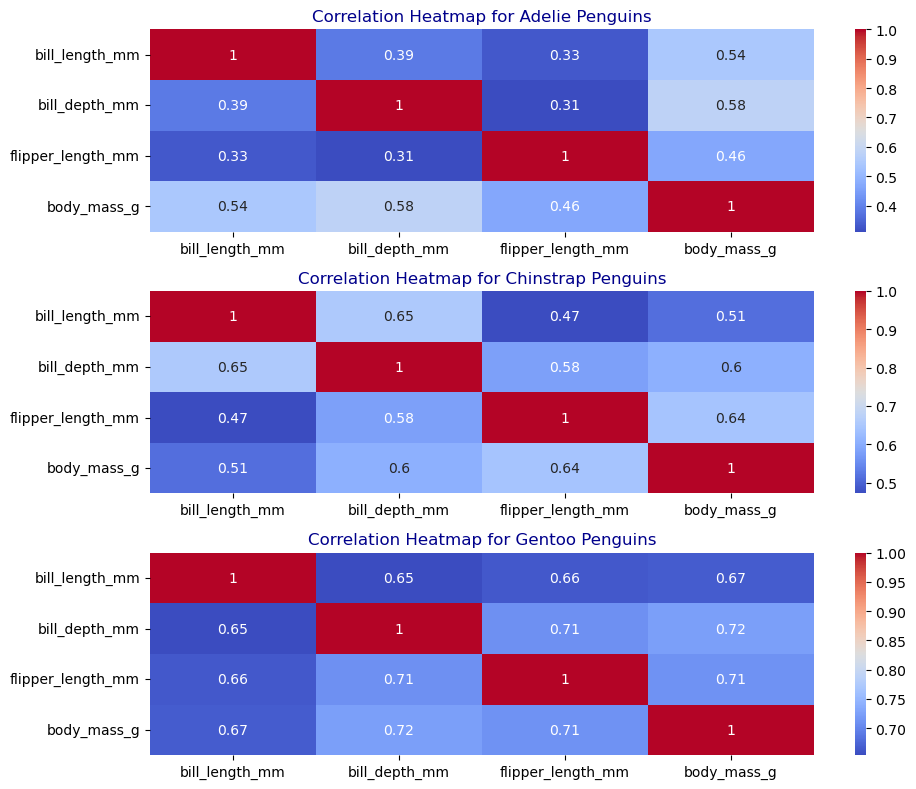

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of species
species_list = df['species'].unique()

# Create subplots for each species
fig, axes = plt.subplots(nrows=len(species_list), figsize=(10, 8))

# Iterate over each species
for i, species in enumerate(species_list):
    # Filter data for the current species
    species_df = df[df['species'] == species]
    
    # Filter numerical variables
    numerical_variables = species_df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlation matrix
    correlation = numerical_variables.corr()
    
    # Create heatmap for the current species
    sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {species} Penguins', color='darkblue')

plt.tight_layout()
plt.show()


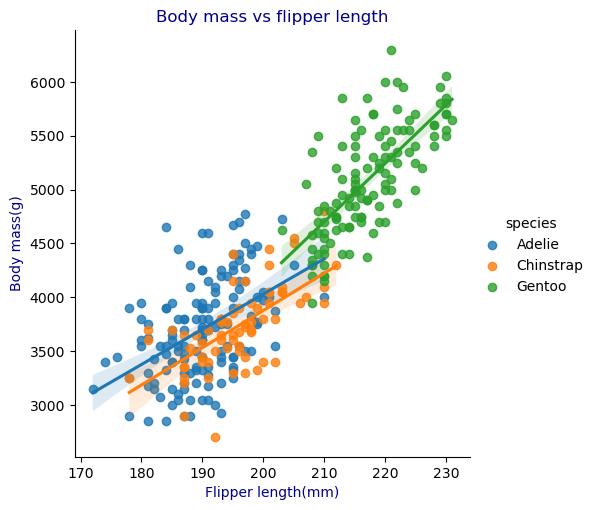

Correlation between flipper length and body mass: 0.872978898565361


In [29]:
# scatter plot of body mass vs flipper length with regression line
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.xlabel('Flipper length(mm)', color='darkblue')
plt.ylabel('Body mass(g)', color='darkblue')
plt.title('Body mass vs flipper length', color='darkblue')
plt.show()

# correlation of flipper length and body mass
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])
print('Correlation between flipper length and body mass:', correlation)


There is a positive correlation between body mass and flipper length for all species of penguin

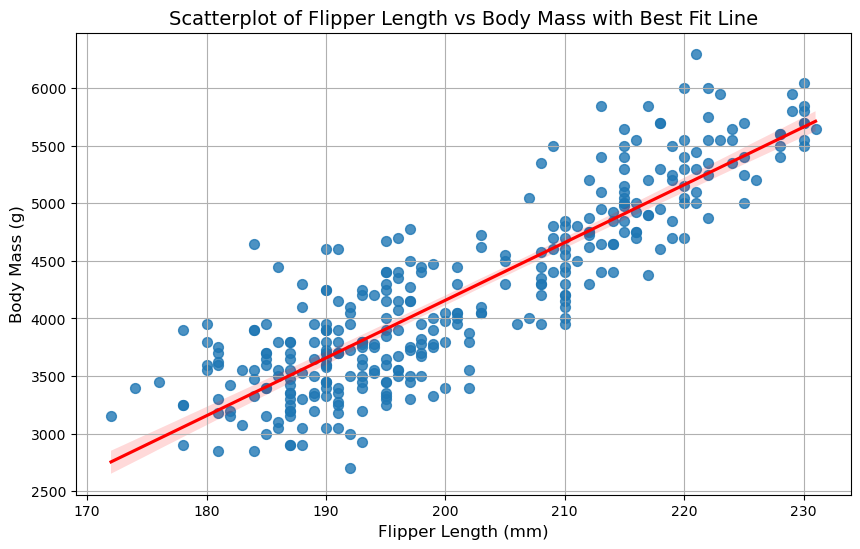

In [30]:
# add best fit line to the scatter plot above
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Flipper Length (mm)', fontsize=12)
plt.ylabel('Body Mass (g)', fontsize=12)
plt.title('Scatterplot of Flipper Length vs Body Mass with Best Fit Line', fontsize=14)

# Show plot
plt.grid(True)

In [31]:
#correlation between flipper length and body mass
df[['flipper_length_mm', 'body_mass_g']].corr()


,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.872979
body_mass_g,0.872979,1.000000


### Bill length vs Bill depth

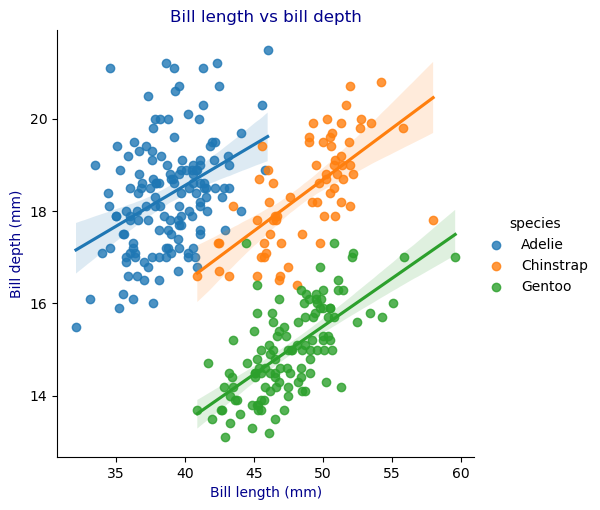

Correlation between bill length and bill depth: -0.22862563591302934


In [32]:
# scatter plot of bill length vs bill depth in sns with regression line
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.xlabel('Bill length (mm)', color='darkblue')
plt.ylabel('Bill depth (mm)', color='darkblue')
plt.title('Bill length vs bill depth', color='darkblue')
plt.show()
# correlation of bill length and bill depth
correlation = df['bill_length_mm'].corr(df['bill_depth_mm'])
print('Correlation between bill length and bill depth:', correlation)

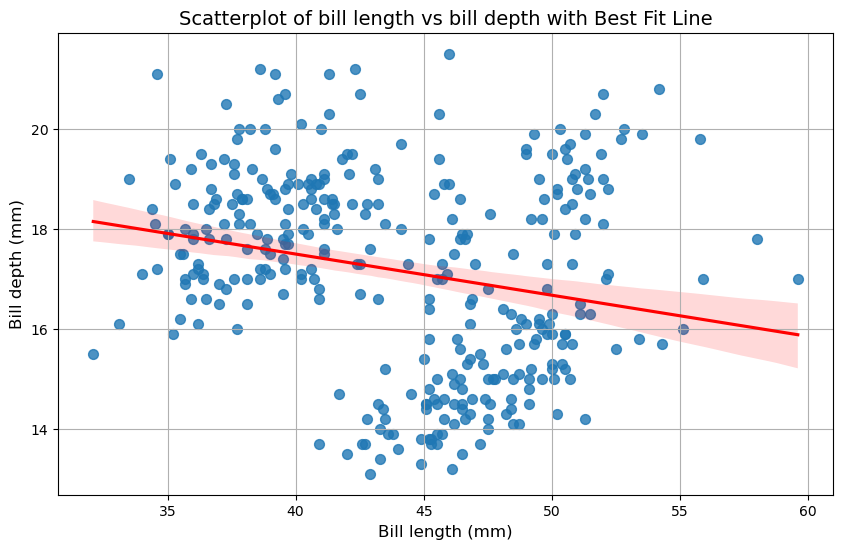

In [33]:
# add best fit line to the scatter plot above
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Bill length (mm)', fontsize=12)
plt.ylabel('Bill depth (mm)', fontsize=12)
plt.title('Scatterplot of bill length vs bill depth with Best Fit Line', fontsize=14)

# Show plot
plt.grid(True)

Simpsons Paradox: a dataset in general may appear to have a trend in positive or negative direction, but then trends in the opposite direction when sub grouping. 

In [34]:
from scipy.stats import linregress

# Assuming X contains flipper length and Y contains body mass
X = df['flipper_length_mm']
Y = df['body_mass_g']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)




Slope: 50.15326594224111
Intercept: -5872.092682842823
R-squared: 0.7620921573403913
P-value: 3.1328362509719978e-105
Standard error: 1.5402309838246344


The slope in linear regression analysis represents the rate of change in the dependent variable(y-axis) for a one unit increase in in the independent variable (x-axis). In this case the flipper length is the independent variable while body mass is the dependent varibale. A slope value of 50.1533 means that on average for every 1mm increase in flipper length, the body mass of the penguins increases approximately 50.1533g. 

NameError: name 'LinearRegression' is not defined

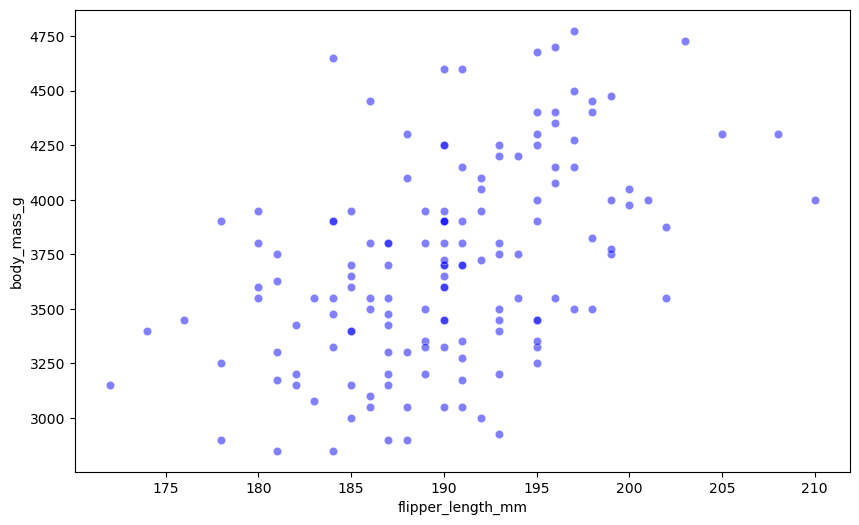

In [35]:


# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df, color='blue', alpha=0.5)

# Fit linear regression model
X = adelie_df[['flipper_length_mm']]
y = adelie_df['body_mass_g']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass with Regression Line')

# Show plot
plt.grid(True)
plt.show()


# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Calculate correlation coefficient for Adélie penguins
adelie_correlation_coefficient = adelie_df['flipper_length_mm'].corr(adelie_df['body_mass_g'])

print("Correlation Coefficient (Adélie Penguins):", adelie_correlation_coefficient)


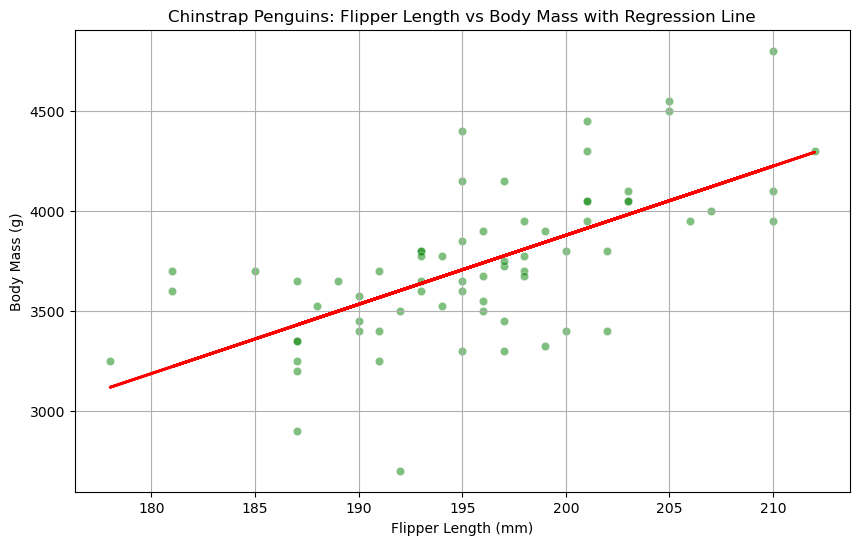

Correlation Coefficient (Chinstrap Penguins): 0.6415594129316968


In [ ]:
# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df, color='green', alpha=0.5)

# Fit linear regression model
X = chinstrap_df[['flipper_length_mm']]
y = chinstrap_df['body_mass_g']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Chinstrap Penguins: Flipper Length vs Body Mass with Regression Line')

# Show plot
plt.grid(True)
plt.show()


# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Calculate correlation coefficient for Chinstrap penguins
chinstrap_correlation_coefficient = chinstrap_df['flipper_length_mm'].corr(chinstrap_df['body_mass_g'])

print("Correlation Coefficient (Chinstrap Penguins):", chinstrap_correlation_coefficient)


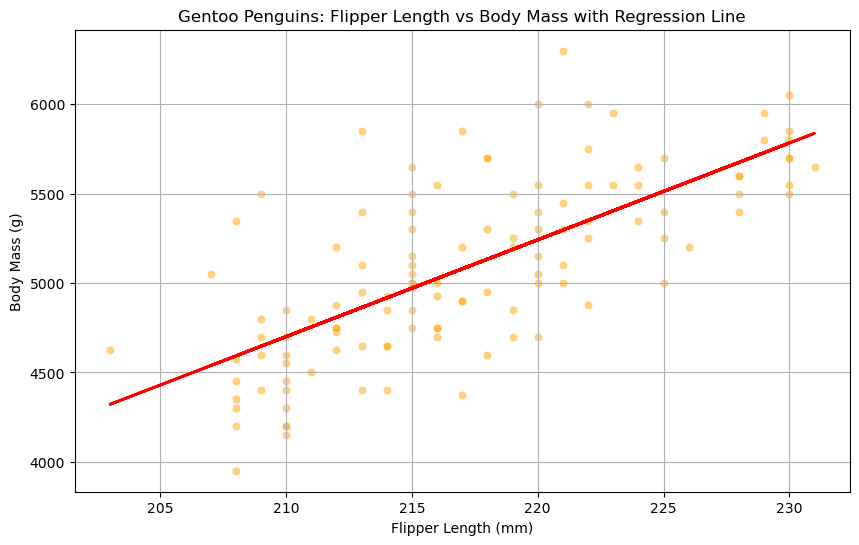

Correlation Coefficient (Gentoo Penguins): 0.7113052561445228


In [ ]:

# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df, color='orange', alpha=0.5)

# Fit linear regression model
X = gentoo_df[['flipper_length_mm']]
y = gentoo_df['body_mass_g']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins: Flipper Length vs Body Mass with Regression Line')

# Show plot
plt.grid(True)
plt.show()


# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Calculate correlation coefficient for Gentoo penguins
gentoo_correlation_coefficient = gentoo_df['flipper_length_mm'].corr(gentoo_df['body_mass_g'])

print("Correlation Coefficient (Gentoo Penguins):", gentoo_correlation_coefficient)


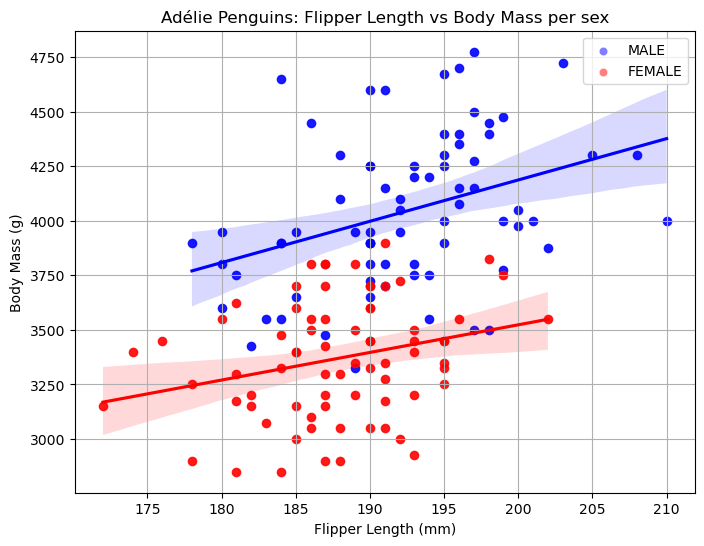

Correlation Coefficient (Male Adélie Penguins): nan
Correlation Coefficient (Female Adélie Penguins): nan


In [ ]:
# Plot scatterplot with regression line for male Adélie penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], color='blue')

# Plot scatterplot with regression line for female Adélie penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], color='red', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], color='red')

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass per sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()



# Calculate correlation coefficient for male Adélie penguins
male_adelie_df = adelie_df[adelie_df['sex'] == 'male']
male_adelie_correlation_coefficient = male_adelie_df['flipper_length_mm'].corr(male_adelie_df['body_mass_g'])
print("Correlation Coefficient (Male Adélie Penguins):", male_adelie_correlation_coefficient)

# Calculate correlation coefficient for female Adélie penguins
female_adelie_df = adelie_df[adelie_df['sex'] == 'female']
female_adelie_correlation_coefficient = female_adelie_df['flipper_length_mm'].corr(female_adelie_df['body_mass_g'])
print("Correlation Coefficient (Female Adélie Penguins):", female_adelie_correlation_coefficient)


In [ ]:
# Assuming you have a DataFrame named 'df' containing flipper length, body mass, sex, and species columns
# Example data structure:
# df = pd.DataFrame({'species': [...], 'sex': [...], 'flipper_length_mm': [...], 'body_mass_g': [...]})

# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Calculate correlation coefficient for male Adélie penguins
male_adelie_df = adelie_df[adelie_df['sex'] == 'male']
male_adelie_correlation_coefficient = male_adelie_df['flipper_length_mm'].corr(male_adelie_df['body_mass_g'])
print("Correlation Coefficient (Male Adélie Penguins):", male_adelie_correlation_coefficient)

# Calculate correlation coefficient for female Adélie penguins
female_adelie_df = adelie_df[adelie_df['sex'] == 'female']
female_adelie_correlation_coefficient = female_adelie_df['flipper_length_mm'].corr(female_adelie_df['body_mass_g'])
print("Correlation Coefficient (Female Adélie Penguins):", female_adelie_correlation_coefficient)

# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Calculate correlation coefficient for male Chinstrap penguins
male_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'MALE']
male_chinstrap_correlation_coefficient = male_chinstrap_df['flipper_length_mm'].corr(male_chinstrap_df['body_mass_g'])
print("Correlation Coefficient (Male Chinstrap Penguins):", male_chinstrap_correlation_coefficient)

# Calculate correlation coefficient for female Chinstrap penguins
female_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'FEMALE']
female_chinstrap_correlation_coefficient = female_chinstrap_df['flipper_length_mm'].corr(female_chinstrap_df['body_mass_g'])
print("Correlation Coefficient (Female Chinstrap Penguins):", female_chinstrap_correlation_coefficient)


# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Calculate correlation coefficient for male Gentoo penguins
male_gentoo_df = gentoo_df[gentoo_df['sex'] == 'MALE']
male_correlation_coefficient = male_gentoo_df['flipper_length_mm'].corr(male_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Male Gentoo Penguins):", male_correlation_coefficient)

# Calculate correlation coefficient for female Gentoo penguins
female_gentoo_df = gentoo_df[gentoo_df['sex'] == 'FEMALE']
female_correlation_coefficient = female_gentoo_df['flipper_length_mm'].corr(female_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Female Gentoo Penguins):", female_correlation_coefficient)

Correlation Coefficient (Male Adélie Penguins): nan
Correlation Coefficient (Female Adélie Penguins): nan
Correlation Coefficient (Male Chinstrap Penguins): 0.6645877076388736
Correlation Coefficient (Female Chinstrap Penguins): 0.24215001572228773
Correlation Coefficient (Male Gentoo Penguins): 0.3304519850062649
Correlation Coefficient (Female Gentoo Penguins): 0.48761802443174745


In [ ]:
print("Unique values in 'flipper_length_mm':", adelie_df['flipper_length_mm'].unique())
print("Unique values in 'body_mass_g':", adelie_df['body_mass_g'].unique())


Unique values in 'flipper_length_mm': [181. 186. 195. 193. 190. 182. 191. 198. 185. 197. 184. 194. 174. 180.
 189. 187. 183. 172. 178. 188. 196. 200. 192. 202. 205. 208. 203. 199.
 176. 210. 201.]
Unique values in 'body_mass_g': [3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 4400. 3700. 4500. 3325.
 4200. 3400. 3600. 3950. 3550. 3150. 3900. 3300. 4150. 4650. 3100. 3000.
 4600. 3425. 3500. 4300. 4050. 2900. 2850. 3350. 4100. 3050. 4450. 4250.
 4000. 4700. 4350. 3725. 4725. 3075. 2925. 3175. 4775. 3825. 4275. 4075.
 3775. 3875. 3275. 4475. 3975. 3475.]


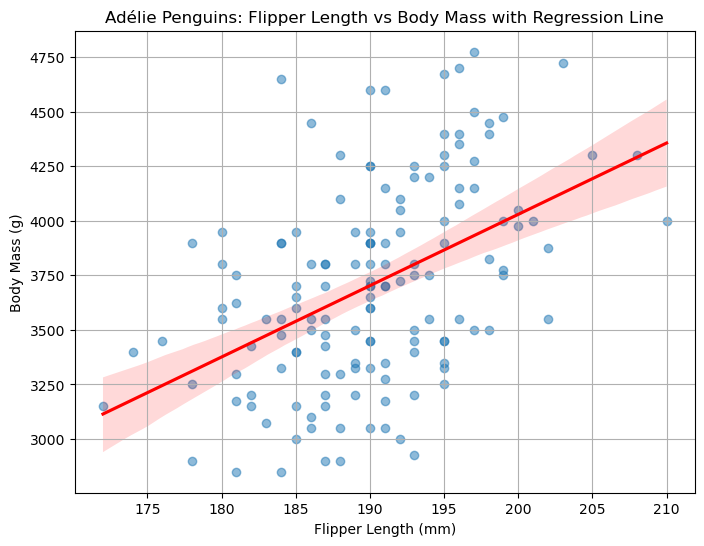

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing flipper length, body mass, and sex columns
# Example data structure:
# df = pd.DataFrame({'sex': [...], 'flipper_length_mm': [...], 'body_mass_g': [...]})

# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Plot scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass with Regression Line')

# Show plot
plt.grid(True)
plt.show()


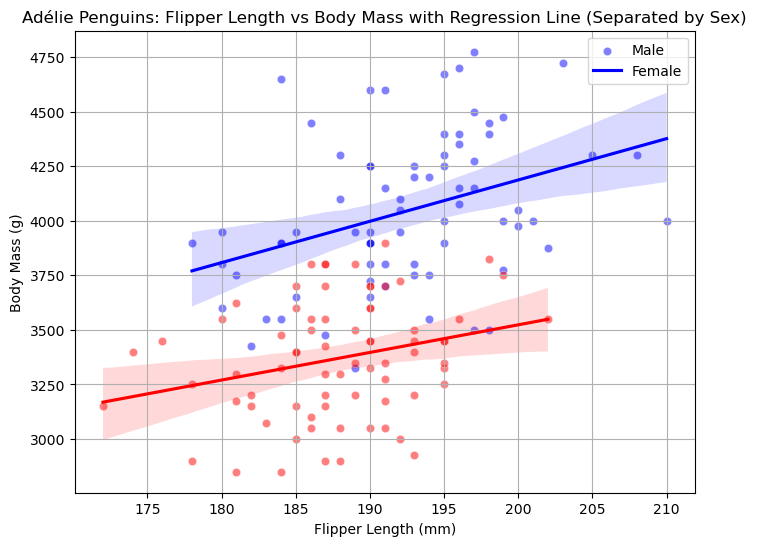

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing flipper length, body mass, and sex columns
# Example data structure:
# df = pd.DataFrame({'sex': [...], 'flipper_length_mm': [...], 'body_mass_g': [...]})

# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Plot scatterplot with regression line for male Adélie penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], color='blue', alpha=0.5)
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], scatter=False, color='blue')

# Plot scatterplot with regression line for female Adélie penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], color='red', alpha=0.5)
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], scatter=False, color='red')

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass with Regression Line (Separated by Sex)')

# Show plot
plt.legend(['Male', 'Female'])
plt.grid(True)
plt.show()



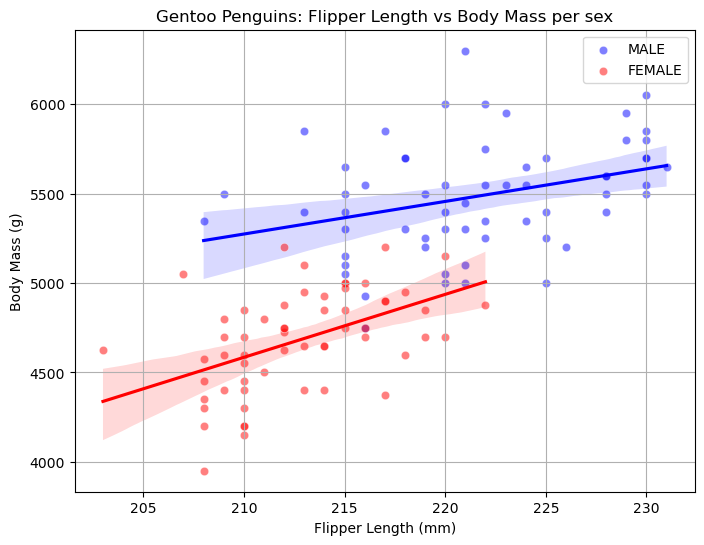

Correlation Coefficient (Male Gentoo Penguins): 0.3304519850062649
Correlation Coefficient (Female Gentoo Penguins): 0.48761802443174745


In [ ]:
# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Plot scatterplot with lighter colors for male Gentoo penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'MALE'], color='blue', scatter=False)

# Plot scatterplot with lighter colors for female Gentoo penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'FEMALE'], color='red', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'FEMALE'], color='red', scatter=False)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins: Flipper Length vs Body Mass per sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()



# Calculate correlation coefficient for male Gentoo penguins
male_gentoo_df = gentoo_df[gentoo_df['sex'] == 'MALE']
male_correlation_coefficient = male_gentoo_df['flipper_length_mm'].corr(male_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Male Gentoo Penguins):", male_correlation_coefficient)

# Calculate correlation coefficient for female Gentoo penguins
female_gentoo_df = gentoo_df[gentoo_df['sex'] == 'FEMALE']
female_correlation_coefficient = female_gentoo_df['flipper_length_mm'].corr(female_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Female Gentoo Penguins):", female_correlation_coefficient)


correlation coefficients indicate the strength and direction of the linear relationship between flipper length and body mass for male and female Gentoo penguins. 

A correlation of 0.33 indicates a weak positive linear relationship between the flipper length and body mass for male Gentoo penguins. This means that as flipper length increases, body mass tends to increase but the relationship is not very strong. 

For female Gentoo penguins a correlation coefficient of 0.48 indicates a moderate positive linear relationship between flipper length and body mass for female Gentoo penguins. the relationship is stronger in comparison to male Gentoo penguins. 

in both cases, positive correlation indicates that as one variable increases the other variable tends to increase also. However, the strength of the relationship is different with a correlation coefficiant closer to 1 indicating a strong linear relationship. 

The correlation coefficient calculated for Gentoo penguins when not separated based on sex is stronger at 0.71 compared to when separating by sex due to the combined effect of male and female data points. The stronger correlation observed when not separating based on sex can suggest a more consistent or stronger relationship between flipper length and body mass for Gentoo penguins when considering all data points regardless of sex. Analysing all data points together increases the sample size and may give a more accurate estimate of the overall relationship.if there are similar trends in flipper length and body mass between male and female penguins, separating by sex may not reveal substantially different correlation coefficients. 

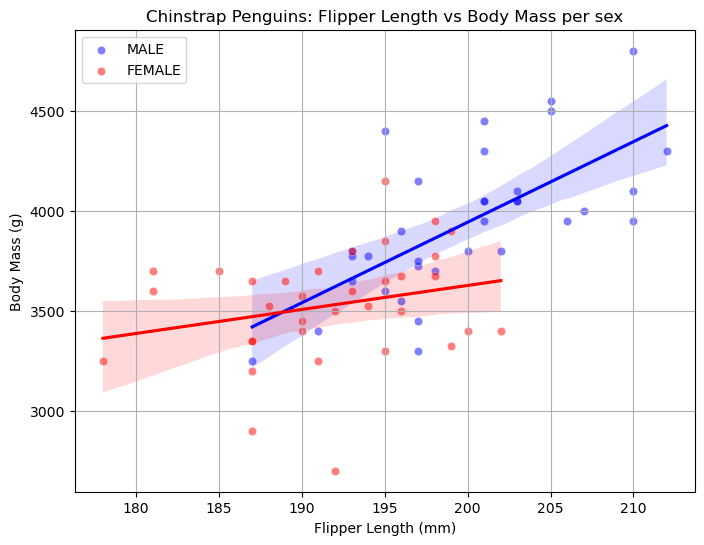

Correlation Coefficient (Male Chinstrap Penguins): 0.6645877076388736
Correlation Coefficient (Female Chinstrap Penguins): 0.24215001572228773


In [ ]:
# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Plot scatterplot with lighter colors for male Chinstrap penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'MALE'], color='blue', scatter=False)

# Plot scatterplot with lighter colors for female Chinstrap penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'FEMALE'], color='red', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'FEMALE'], color='red', scatter=False)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Chinstrap Penguins: Flipper Length vs Body Mass per sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()


# Calculate correlation coefficient for male and female Chinstrap penguins
male_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'MALE']
female_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'FEMALE']

male_correlation_coefficient = male_chinstrap_df['flipper_length_mm'].corr(male_chinstrap_df['body_mass_g'])
female_correlation_coefficient = female_chinstrap_df['flipper_length_mm'].corr(female_chinstrap_df['body_mass_g'])

print("Correlation Coefficient (Male Chinstrap Penguins):", male_correlation_coefficient)
print("Correlation Coefficient (Female Chinstrap Penguins):", female_correlation_coefficient)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing flipper length, body mass, and species columns
# Example data structure:
# df = pd.DataFrame({'species': [...], 'flipper_length_mm': [...], 'body_mass_g': [...]})

# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Calculate correlation coefficient for Gentoo penguins
correlation_coefficient = gentoo_df['flipper_length_mm'].corr(gentoo_df['body_mass_g'])
print("Correlation Coefficient for Gentoo Penguins (Flipper Length vs Body Mass):", correlation_coefficient)


# Filter dataFrame for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Calculate correlation coefficient for Adélie penguins
correlation_coefficient = adelie_df['flipper_length_mm'].corr(adelie_df['body_mass_g'])
print("Correlation Coefficient for Adélie Penguins (Flipper Length vs Body Mass):", correlation_coefficient)


# Filter dataFrame for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Calculate correlation coefficient for Chinstrap penguins
correlation_coefficient = chinstrap_df['flipper_length_mm'].corr(chinstrap_df['body_mass_g'])
print("Correlation Coefficient for Chinstrap Penguins (Flipper Length vs Body Mass):", correlation_coefficient)


Correlation Coefficient for Gentoo Penguins (Flipper Length vs Body Mass): 0.7113052561445228
Correlation Coefficient for Adélie Penguins (Flipper Length vs Body Mass): 0.4648539302610766
Correlation Coefficient for Chinstrap Penguins (Flipper Length vs Body Mass): 0.6415594129316968


A lower correlation coefficins indicates a weaker linear relationship between the two variables. this could mean that for Adelie penguins changes in flipper length are not as strongly associated with changes in body mass as they might be for other species. This could be for several reasons such as biological variation. Adelie penguins may exhibit more variablity in flipper length and body mass compared to other species, leading to a weaker correlation between the two variables. Environmental factors or ecological differences specific to Adelie penguins habitat may influence their body proportions differently compared to other species, affecting the correlation between flipper length and body mass. 

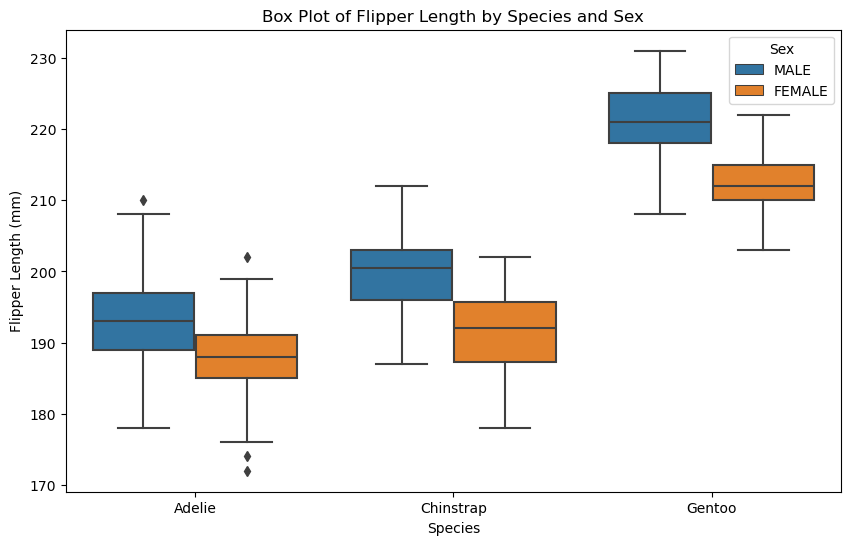

In [ ]:



# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=df)

# Add title and labels
plt.title('Box Plot of Flipper Length by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()


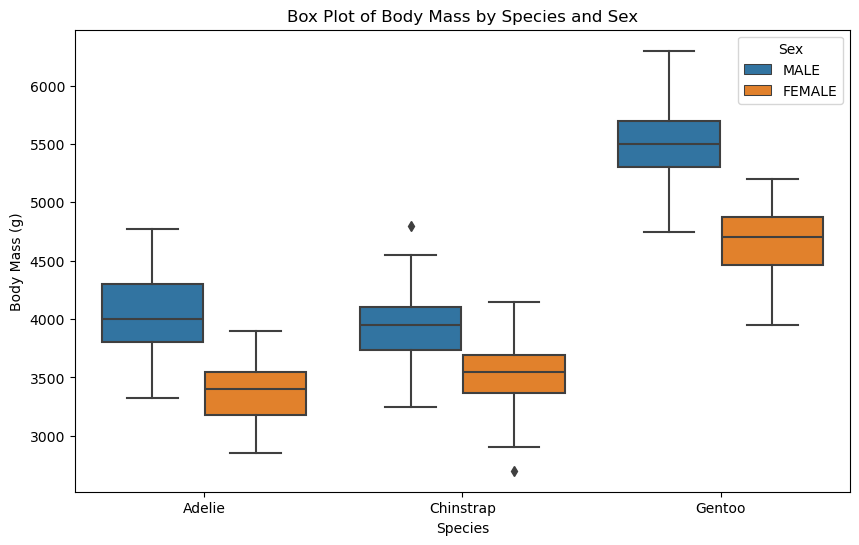

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing body mass, sex, and species columns
# Example data structure:
# df = pd.DataFrame({'species': [...], 'sex': [...], 'body_mass_g': [...]})

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=df)

# Add title and labels
plt.title('Box Plot of Body Mass by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()


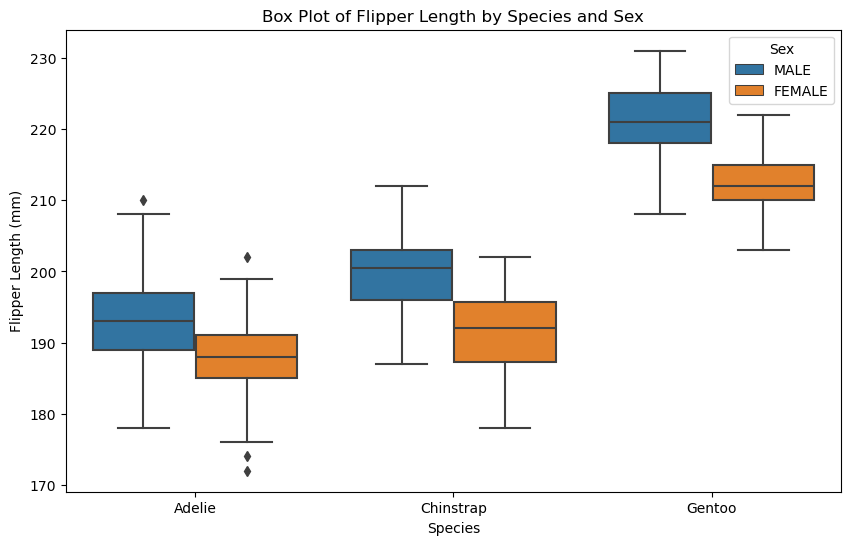

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing flipper length, sex, and species columns
# Example data structure:
# df = pd.DataFrame({'species': [...], 'sex': [...], 'flipper_length_mm': [...]})

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=df)

# Add title and labels
plt.title('Box Plot of Flipper Length by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()
